### Multivariate Polynomial Regression model on Detector-1 dataset

In [280]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math
import warnings
warnings.filterwarnings('ignore')

In [281]:
df = pd.read_csv('../Data_Files/Processsed data/det1.csv')

### Scaling the data set

In [282]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Implementing the model

In [283]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=20,include_bias=True,interaction_only=True)
X_poly = poly.fit_transform(X_train)

In [284]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y_train)

LinearRegression()

In [285]:
y_pred = lin_reg.predict(poly.fit_transform(X_test))

In [286]:
y_pd = []
for i in range(len(y_pred)):
    y_pd.append(y_pred[i][0])

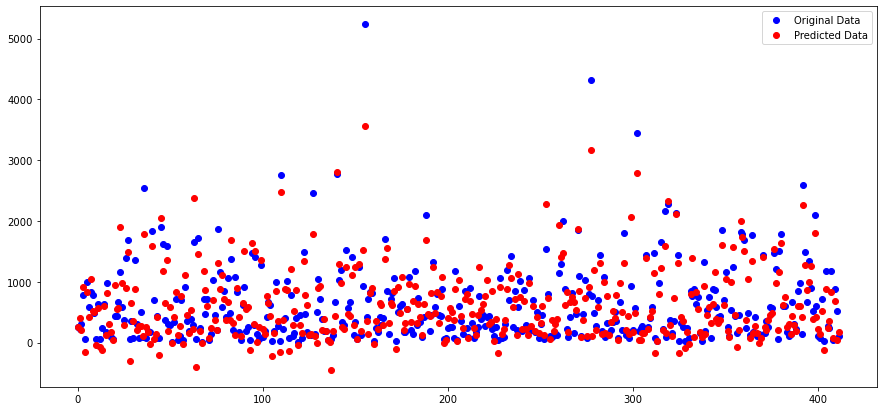

In [292]:
plt.figure(figsize=(15,7))
plt.plot(sc_y.inverse_transform(y_test),'bo')
plt.plot(sc_y.inverse_transform(y_pd),'ro')
plt.legend(['Original Data','Predicted Data'])